In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, pickle
import sys
sys.path.append("../")

from general.utils import load_json
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Before evaluation of BPF results train the following models:



In [351]:
### Generate the python commands ##
# run dataset corresponding preprocessing notebook before and update directories in dataloaders.datasets.py file

dataset = 'adult' 
# dataset = 'lawschool'
# dataset = 'compas'
# dataset = 'synth1d2c'


basedir = '/data/natalia/models/'+dataset+'/BPF/'
model_name_prefix = 'BPF_512_adam1e5_wreg1e2_'

## optimizer
optim = 'adam' #RMSprop
lr=1e-5
regweight = 1e-2

if 'synth' in dataset:
    model_name_prefix = 'DRO_512_adam1e4_'
    lr=1e-4
    regweight = 0


#Projector step
eta = 5
## Network
hlayers = '512x1'
batchsize=128

#dictionary with partition size tags and corresponding value
rho_dic = {'005':0.05,'01':1e-1,'015':0.15, '02': 2e-1, '025':0.25,'03': 3e-1,
           '035':0.35, '04': 4e-1,'045':0.45, '05': 5e-1, '055':0.55, '06':6e-1 ,
           '065':0.65, '07':7e-1,'075':0.75, '08':8e-1, '085':0.85,
           '09':9e-1 , '095':0.95, '1':1}
#dictionary with lower bound tags and corresponding value
epsilon_dic={'1e3':1e-3,'1e2':1e-2,'1e4':1e-4,'1e1':1e-1}


games=300
regression = False
loss_list = ['CE']
seed_list=[42]
split_list = [1,2,3,4,5]  #change to one split if needed (split_list = [1])

train = True
gpu = 0

epsilon_list = ['1e2']
rho_list = ['005','01','015','02','025',
            '03','035','04','045','05',
            '055','06','065','07','075',
            '08','085','09','095','1']

for split in split_list:
    for seed in seed_list:
        for loss in loss_list:
            for rho_str in rho_list:
                for epsilon_str in epsilon_list:
                    epsilon = epsilon_dic[epsilon_str]
                    rho = rho_dic[rho_str]

                    out_file_ext = dataset + '_' + model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                   str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str + '_verbose'

                    model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                 str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str
                    
                    cmd = 'python main_BPF_tabular.py --basedir="{}" --dataset="{}" --model_name="{}"  --gpu={}'.format(basedir, dataset, model_name,gpu)

                    cmd = cmd + ' --optim_regw={} --optim="{}" --lr={} --train={} '.format(regweight,optim,lr,train)
                    cmd = cmd + ' --rho={} --epsilon={} --hlayers="{}" --games={} --seed={} --split={}'.format(rho, epsilon,hlayers,games, seed, split)
                    cmd = cmd + ' --eta={} '.format(eta)
                    cmd = cmd + ' --loss="{}" --regression={} --batch={} > {}.txt'.format(loss, regression, batchsize, out_file_ext)
                    print(cmd)
                    print()

python main_BPF_tabular.py --basedir="/data/natalia/models/adult/BPF/" --dataset="adult" --model_name="BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho005_epsilon1e2"  --gpu=0 --optim_regw=0.01 --optim="adam" --lr=1e-05 --train=True  --rho=0.05 --epsilon=0.01 --hlayers="512x1" --games=300 --seed=42 --split=1 --eta=5  --loss="CE" --regression=False --batch=128 > adult_BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho005_epsilon1e2_verbose.txt

python main_BPF_tabular.py --basedir="/data/natalia/models/adult/BPF/" --dataset="adult" --model_name="BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho01_epsilon1e2"  --gpu=0 --optim_regw=0.01 --optim="adam" --lr=1e-05 --train=True  --rho=0.1 --epsilon=0.01 --hlayers="512x1" --games=300 --seed=42 --split=1 --eta=5  --loss="CE" --regression=False --batch=128 > adult_BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho01_epsilon1e2_verbose.txt

python main_BPF_tabular.py --basedir="/data/natalia/models/adult/BPF/" --dataset="adult" --model_name="BPF_512_adam1e5_wreg1e2_CE_s

## Load BPF results

{'train': 105, 'val': 104}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho005_epsilon1e3 ### 0.001 0.05
{'train': 117, 'val': 117}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho005_epsilon1e3 ### 0.001 0.05
{'train': 126, 'val': 124}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho005_epsilon1e3 ### 0.001 0.05
{'train': 113, 'val': 116}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho005_epsilon1e3 ### 0.001 0.05
{'train': 116, 'val': 122}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho005_epsilon1e3 ### 0.001 0.05


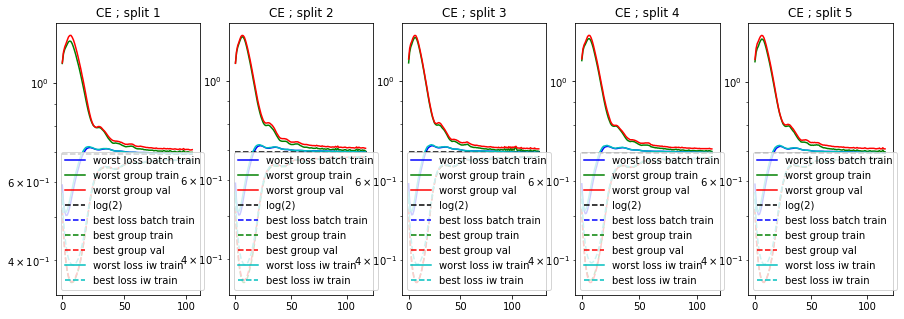

{'train': 95, 'val': 95}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho005_epsilon1e2 ### 0.01 0.05
{'train': 90, 'val': 96}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho005_epsilon1e2 ### 0.01 0.05
{'train': 81, 'val': 93}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho005_epsilon1e2 ### 0.01 0.05
{'train': 121, 'val': 123}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho005_epsilon1e2 ### 0.01 0.05
{'train': 107, 'val': 123}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho005_epsilon1e2 ### 0.01 0.05


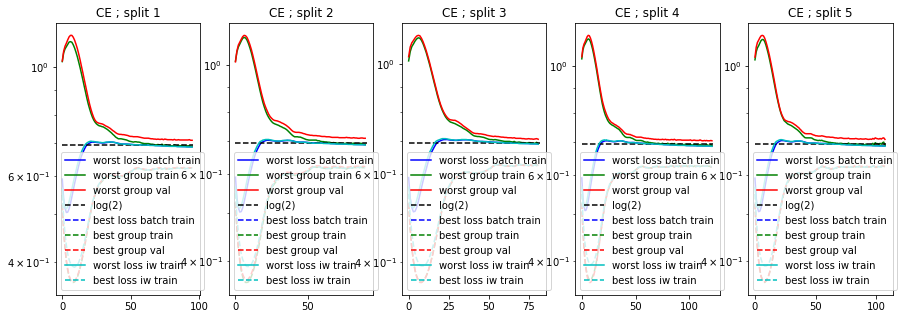

{'train': 99, 'val': 108}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho01_epsilon1e3 ### 0.001 0.1
{'train': 89, 'val': 91}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho01_epsilon1e3 ### 0.001 0.1
{'train': 86, 'val': 86}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho01_epsilon1e3 ### 0.001 0.1
{'train': 95, 'val': 109}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho01_epsilon1e3 ### 0.001 0.1
{'train': 113, 'val': 110}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho01_epsilon1e3 ### 0.001 0.1


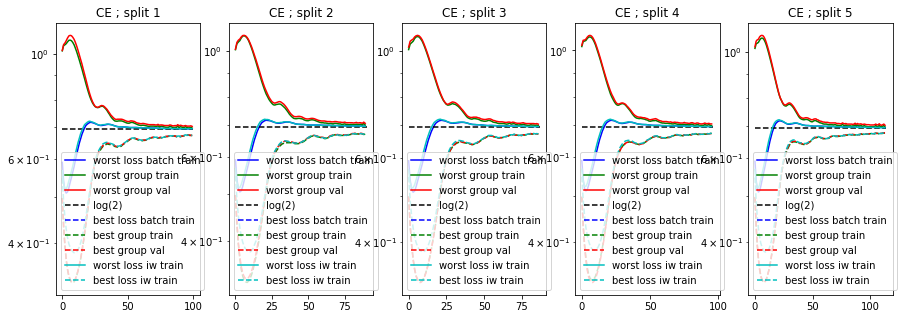

{'train': 99, 'val': 99}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho01_epsilon1e2 ### 0.01 0.1
{'train': 84, 'val': 96}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho01_epsilon1e2 ### 0.01 0.1
{'train': 77, 'val': 81}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho01_epsilon1e2 ### 0.01 0.1
{'train': 82, 'val': 78}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho01_epsilon1e2 ### 0.01 0.1
{'train': 77, 'val': 74}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho01_epsilon1e2 ### 0.01 0.1


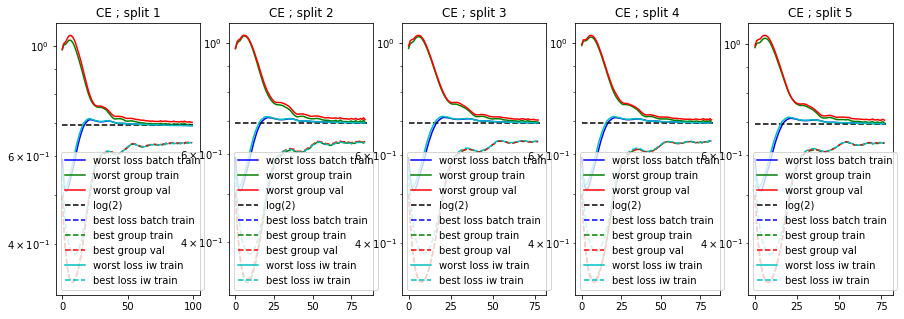

{'train': 87, 'val': 87}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho015_epsilon1e3 ### 0.001 0.15
{'train': 87, 'val': 91}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho015_epsilon1e3 ### 0.001 0.15
{'train': 129, 'val': 141}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho015_epsilon1e3 ### 0.001 0.15
{'train': 92, 'val': 92}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho015_epsilon1e3 ### 0.001 0.15
{'train': 83, 'val': 96}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho015_epsilon1e3 ### 0.001 0.15


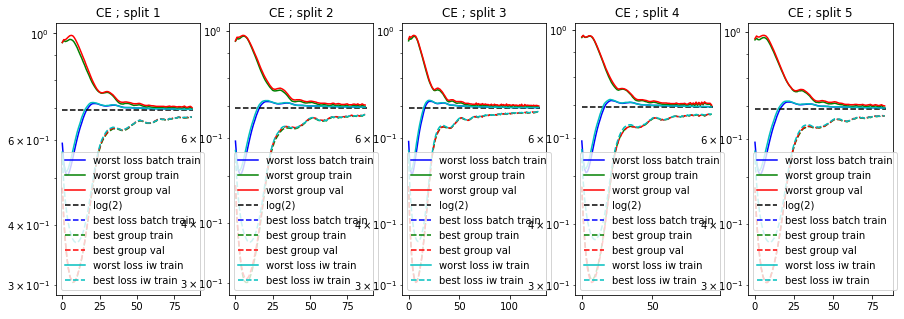

{'train': 89, 'val': 89}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho015_epsilon1e2 ### 0.01 0.15
{'train': 84, 'val': 95}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho015_epsilon1e2 ### 0.01 0.15
{'train': 82, 'val': 79}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho015_epsilon1e2 ### 0.01 0.15
{'train': 71, 'val': 71}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho015_epsilon1e2 ### 0.01 0.15
{'train': 70, 'val': 69}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho015_epsilon1e2 ### 0.01 0.15


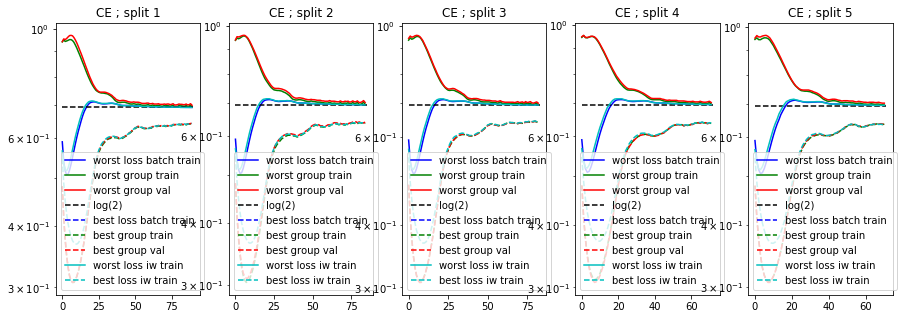

{'train': 72, 'val': 77}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho02_epsilon1e3 ### 0.001 0.2
{'train': 78, 'val': 78}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho02_epsilon1e3 ### 0.001 0.2
{'train': 77, 'val': 87}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho02_epsilon1e3 ### 0.001 0.2
{'train': 64, 'val': 80}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho02_epsilon1e3 ### 0.001 0.2
{'train': 71, 'val': 71}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho02_epsilon1e3 ### 0.001 0.2


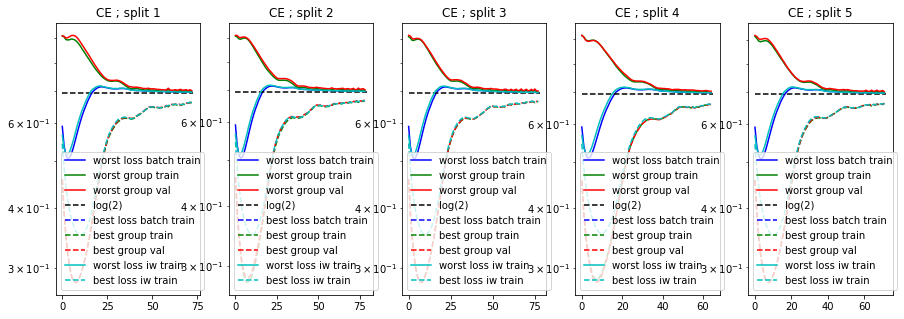

{'train': 64, 'val': 80}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho02_epsilon1e2 ### 0.01 0.2
{'train': 73, 'val': 82}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho02_epsilon1e2 ### 0.01 0.2
{'train': 97, 'val': 107}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho02_epsilon1e2 ### 0.01 0.2
{'train': 85, 'val': 85}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho02_epsilon1e2 ### 0.01 0.2
{'train': 82, 'val': 82}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho02_epsilon1e2 ### 0.01 0.2


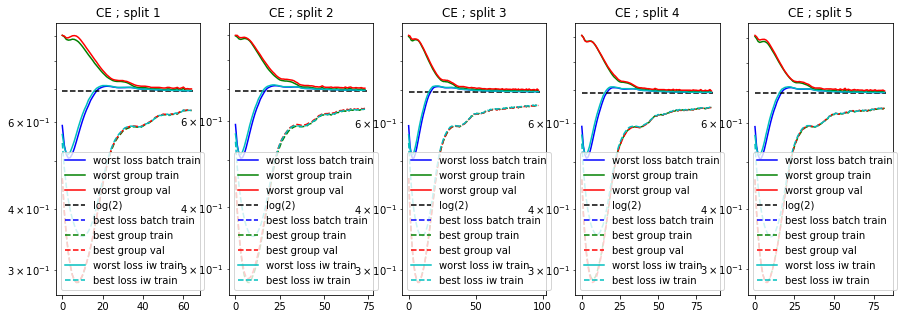

{'train': 66, 'val': 77}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho025_epsilon1e3 ### 0.001 0.25
{'train': 90, 'val': 90}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho025_epsilon1e3 ### 0.001 0.25
{'train': 71, 'val': 71}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho025_epsilon1e3 ### 0.001 0.25
{'train': 89, 'val': 89}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho025_epsilon1e3 ### 0.001 0.25
{'train': 63, 'val': 69}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho025_epsilon1e3 ### 0.001 0.25


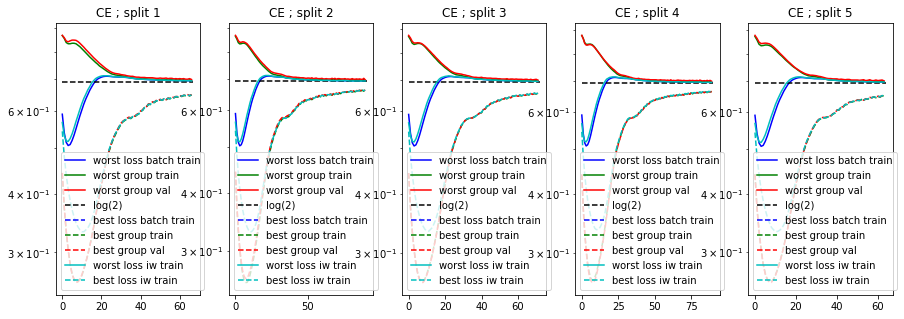

{'train': 76, 'val': 82}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho025_epsilon1e2 ### 0.01 0.25
{'train': 61, 'val': 64}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho025_epsilon1e2 ### 0.01 0.25
{'train': 79, 'val': 79}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho025_epsilon1e2 ### 0.01 0.25
{'train': 74, 'val': 74}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho025_epsilon1e2 ### 0.01 0.25
{'train': 71, 'val': 79}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho025_epsilon1e2 ### 0.01 0.25


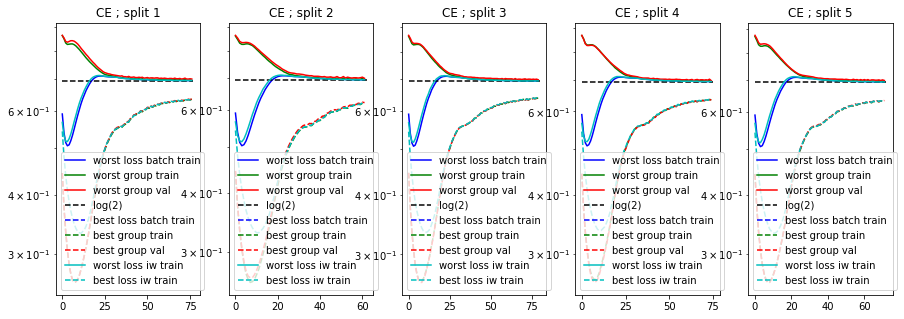

{'train': 73, 'val': 84}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho03_epsilon1e3 ### 0.001 0.3
{'train': 67, 'val': 83}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho03_epsilon1e3 ### 0.001 0.3
{'train': 66, 'val': 81}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho03_epsilon1e3 ### 0.001 0.3
{'train': 76, 'val': 87}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho03_epsilon1e3 ### 0.001 0.3
{'train': 64, 'val': 68}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho03_epsilon1e3 ### 0.001 0.3


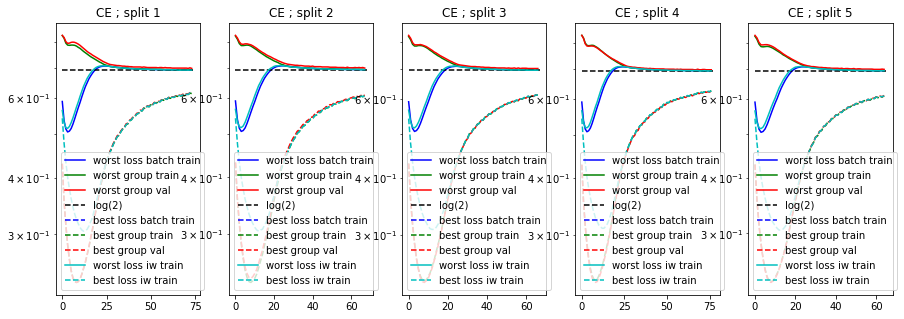

{'train': 70, 'val': 84}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho03_epsilon1e2 ### 0.01 0.3
{'train': 79, 'val': 79}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho03_epsilon1e2 ### 0.01 0.3
{'train': 57, 'val': 68}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho03_epsilon1e2 ### 0.01 0.3
{'train': 61, 'val': 63}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho03_epsilon1e2 ### 0.01 0.3
{'train': 77, 'val': 91}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho03_epsilon1e2 ### 0.01 0.3


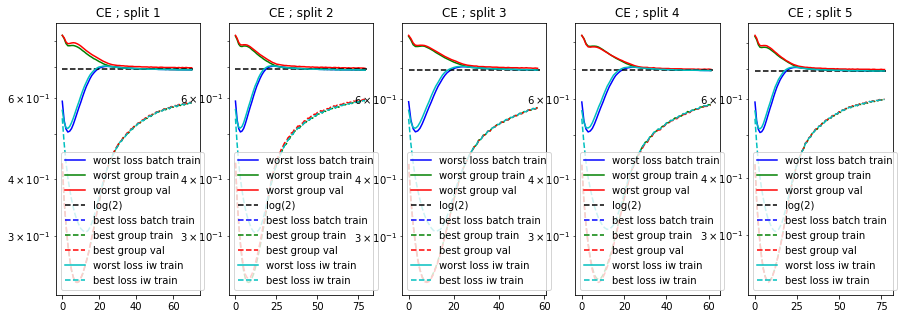

{'train': 76, 'val': 75}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho035_epsilon1e3 ### 0.001 0.35
{'train': 79, 'val': 90}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho035_epsilon1e3 ### 0.001 0.35
{'train': 70, 'val': 78}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho035_epsilon1e3 ### 0.001 0.35
{'train': 66, 'val': 69}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho035_epsilon1e3 ### 0.001 0.35
{'train': 69, 'val': 65}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho035_epsilon1e3 ### 0.001 0.35


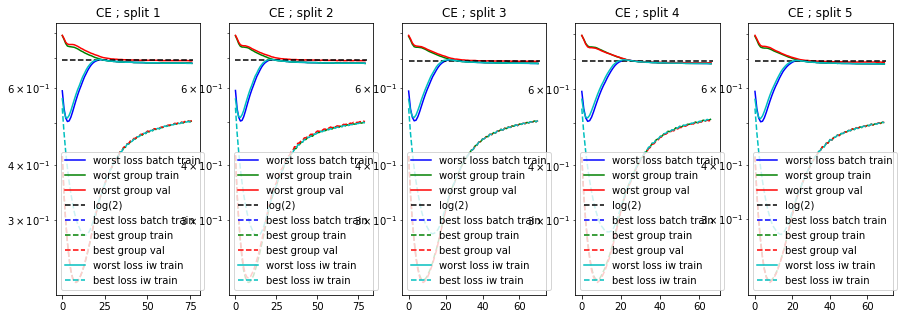

{'train': 65, 'val': 67}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho035_epsilon1e2 ### 0.01 0.35
{'train': 71, 'val': 80}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho035_epsilon1e2 ### 0.01 0.35
{'train': 79, 'val': 62}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho035_epsilon1e2 ### 0.01 0.35
{'train': 78, 'val': 53}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho035_epsilon1e2 ### 0.01 0.35
{'train': 78, 'val': 84}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho035_epsilon1e2 ### 0.01 0.35


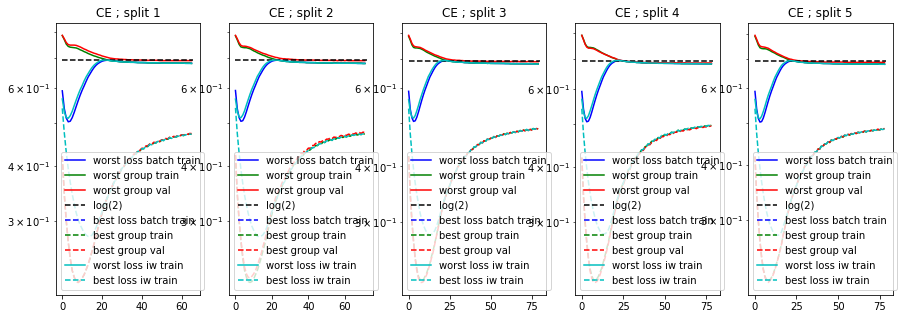

{'train': 196, 'val': 196}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho04_epsilon1e3 ### 0.001 0.4
{'train': 119, 'val': 131}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho04_epsilon1e3 ### 0.001 0.4
{'train': 183, 'val': 195}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho04_epsilon1e3 ### 0.001 0.4
{'train': 184, 'val': 200}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho04_epsilon1e3 ### 0.001 0.4
{'train': 132, 'val': 130}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho04_epsilon1e3 ### 0.001 0.4


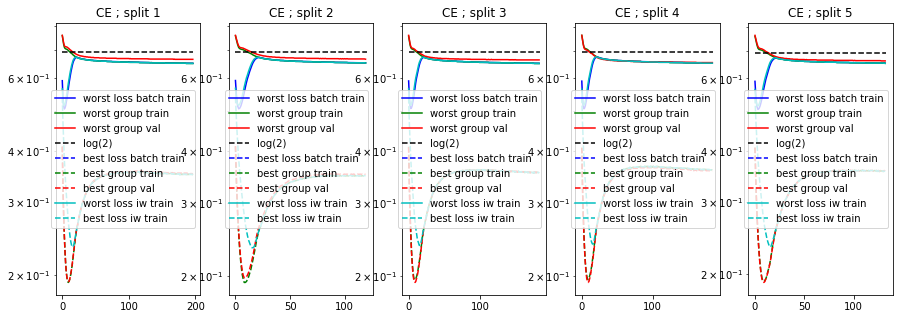

{'train': 216, 'val': 231}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho04_epsilon1e2 ### 0.01 0.4
{'train': 198, 'val': 208}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho04_epsilon1e2 ### 0.01 0.4
{'train': 175, 'val': 189}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho04_epsilon1e2 ### 0.01 0.4
{'train': 235, 'val': 247}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho04_epsilon1e2 ### 0.01 0.4
{'train': 227, 'val': 231}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho04_epsilon1e2 ### 0.01 0.4


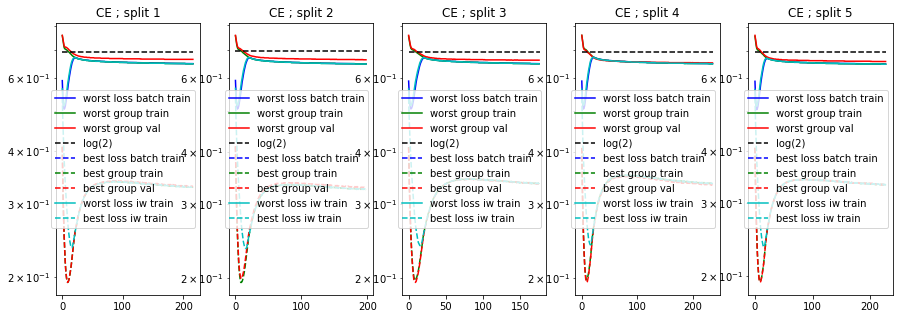

{'train': 200, 'val': 188}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho045_epsilon1e3 ### 0.001 0.45
{'train': 196, 'val': 188}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho045_epsilon1e3 ### 0.001 0.45
{'train': 169, 'val': 159}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho045_epsilon1e3 ### 0.001 0.45
{'train': 194, 'val': 204}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho045_epsilon1e3 ### 0.001 0.45
{'train': 211, 'val': 211}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho045_epsilon1e3 ### 0.001 0.45


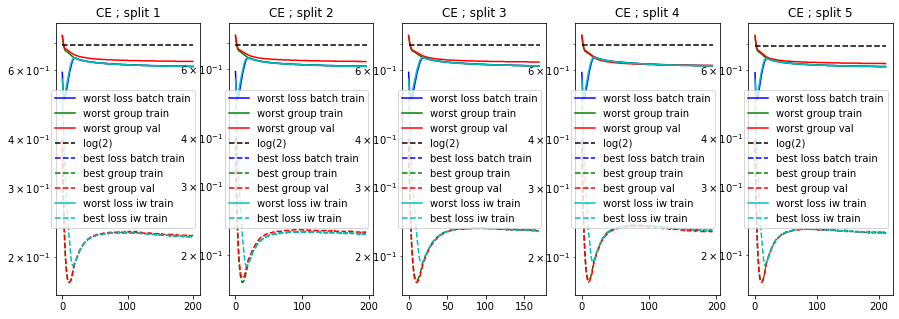

{'train': 198, 'val': 205}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho045_epsilon1e2 ### 0.01 0.45
{'train': 198, 'val': 197}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho045_epsilon1e2 ### 0.01 0.45
{'train': 169, 'val': 183}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho045_epsilon1e2 ### 0.01 0.45
{'train': 194, 'val': 194}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho045_epsilon1e2 ### 0.01 0.45
{'train': 196, 'val': 204}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho045_epsilon1e2 ### 0.01 0.45


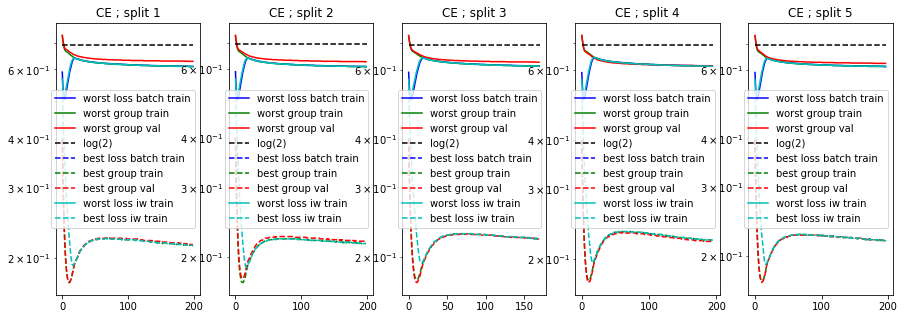

{'train': 154, 'val': 160}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho05_epsilon1e3 ### 0.001 0.5
{'train': 205, 'val': 187}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho05_epsilon1e3 ### 0.001 0.5
{'train': 163, 'val': 163}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho05_epsilon1e3 ### 0.001 0.5
{'train': 165, 'val': 181}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho05_epsilon1e3 ### 0.001 0.5
{'train': 203, 'val': 190}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho05_epsilon1e3 ### 0.001 0.5


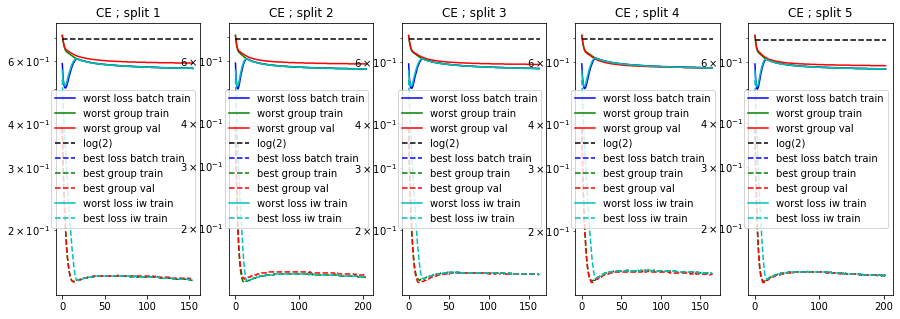

{'train': 189, 'val': 189}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho05_epsilon1e2 ### 0.01 0.5
{'train': 186, 'val': 195}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho05_epsilon1e2 ### 0.01 0.5
{'train': 166, 'val': 175}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho05_epsilon1e2 ### 0.01 0.5
{'train': 192, 'val': 195}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho05_epsilon1e2 ### 0.01 0.5
{'train': 166, 'val': 166}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho05_epsilon1e2 ### 0.01 0.5


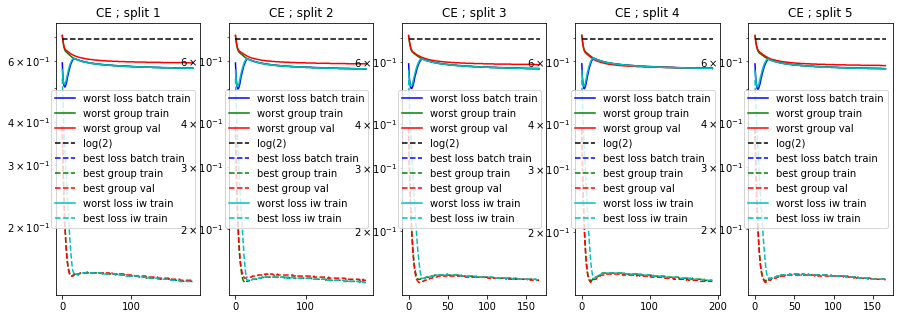

{'train': 159, 'val': 171}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho055_epsilon1e3 ### 0.001 0.55
{'train': 199, 'val': 186}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho055_epsilon1e3 ### 0.001 0.55
{'train': 152, 'val': 163}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho055_epsilon1e3 ### 0.001 0.55
{'train': 172, 'val': 165}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho055_epsilon1e3 ### 0.001 0.55
{'train': 160, 'val': 175}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho055_epsilon1e3 ### 0.001 0.55


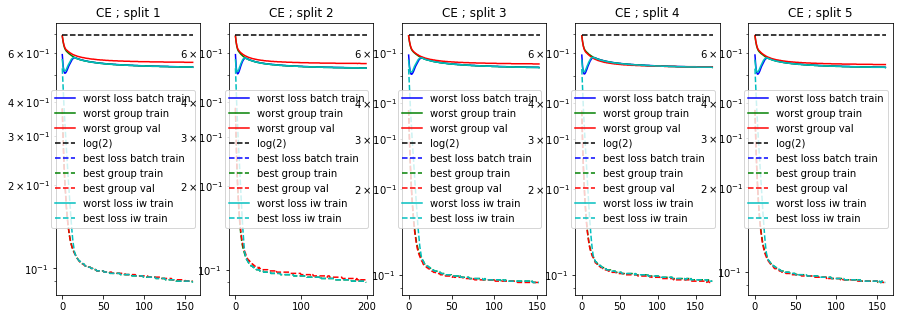

{'train': 176, 'val': 189}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho055_epsilon1e2 ### 0.01 0.55
{'train': 208, 'val': 213}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho055_epsilon1e2 ### 0.01 0.55
{'train': 146, 'val': 148}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho055_epsilon1e2 ### 0.01 0.55
{'train': 168, 'val': 175}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho055_epsilon1e2 ### 0.01 0.55
{'train': 173, 'val': 166}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho055_epsilon1e2 ### 0.01 0.55


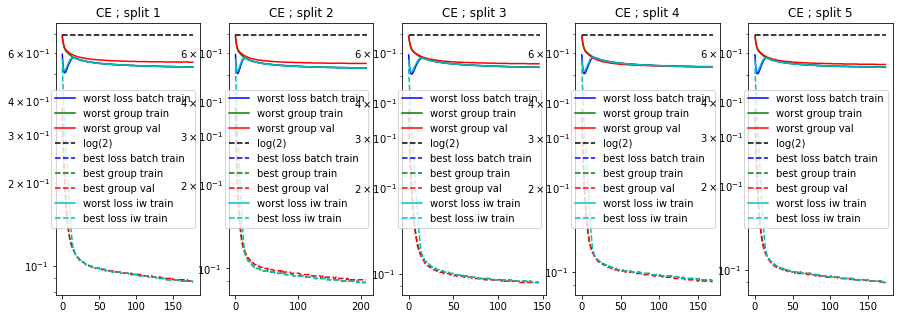

{'train': 176, 'val': 191}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho06_epsilon1e3 ### 0.001 0.6
{'train': 197, 'val': 197}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho06_epsilon1e3 ### 0.001 0.6
{'train': 153, 'val': 167}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho06_epsilon1e3 ### 0.001 0.6
{'train': 154, 'val': 164}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho06_epsilon1e3 ### 0.001 0.6
{'train': 142, 'val': 155}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho06_epsilon1e3 ### 0.001 0.6


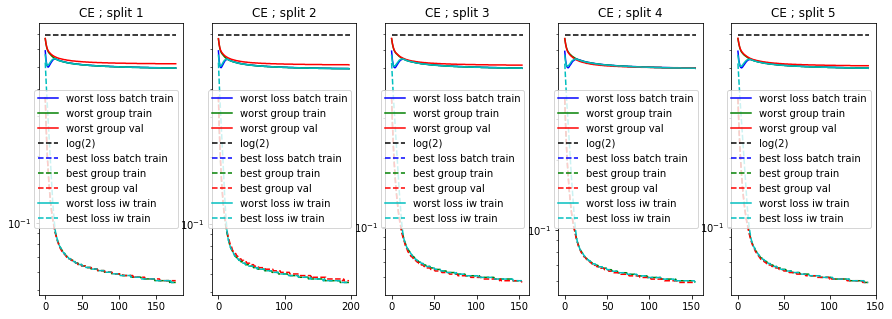

{'train': 170, 'val': 179}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho06_epsilon1e2 ### 0.01 0.6
{'train': 189, 'val': 184}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho06_epsilon1e2 ### 0.01 0.6
{'train': 168, 'val': 183}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho06_epsilon1e2 ### 0.01 0.6
{'train': 150, 'val': 157}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho06_epsilon1e2 ### 0.01 0.6
{'train': 155, 'val': 164}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho06_epsilon1e2 ### 0.01 0.6


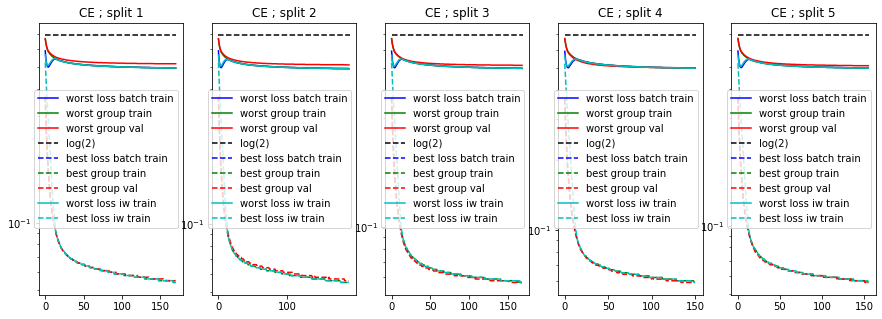

{'train': 144, 'val': 149}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho065_epsilon1e3 ### 0.001 0.65
{'train': 165, 'val': 163}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho065_epsilon1e3 ### 0.001 0.65
{'train': 141, 'val': 155}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho065_epsilon1e3 ### 0.001 0.65
{'train': 158, 'val': 165}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho065_epsilon1e3 ### 0.001 0.65
{'train': 146, 'val': 162}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho065_epsilon1e3 ### 0.001 0.65


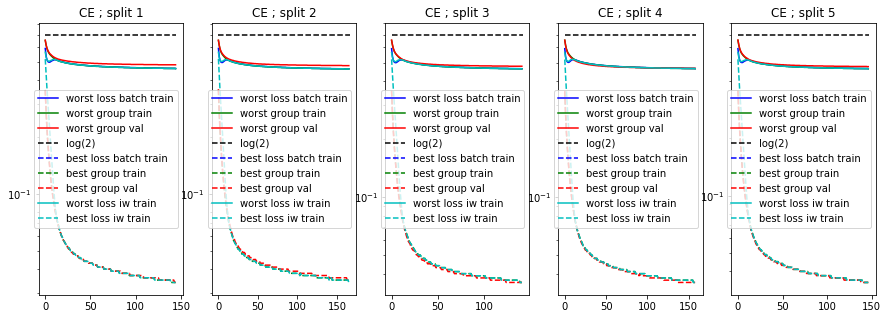

{'train': 181, 'val': 184}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho065_epsilon1e2 ### 0.01 0.65
{'train': 179, 'val': 191}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho065_epsilon1e2 ### 0.01 0.65
{'train': 181, 'val': 196}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho065_epsilon1e2 ### 0.01 0.65
{'train': 158, 'val': 168}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho065_epsilon1e2 ### 0.01 0.65
{'train': 144, 'val': 143}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho065_epsilon1e2 ### 0.01 0.65


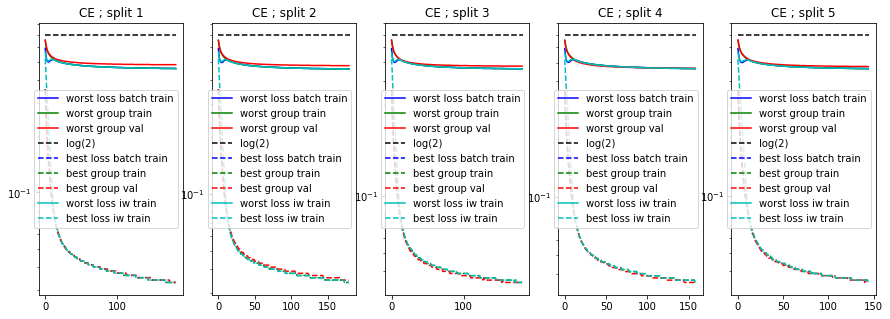

{'train': 176, 'val': 187}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho07_epsilon1e3 ### 0.001 0.7
{'train': 154, 'val': 156}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho07_epsilon1e3 ### 0.001 0.7
{'train': 134, 'val': 145}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho07_epsilon1e3 ### 0.001 0.7
{'train': 149, 'val': 165}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho07_epsilon1e3 ### 0.001 0.7
{'train': 138, 'val': 147}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho07_epsilon1e3 ### 0.001 0.7


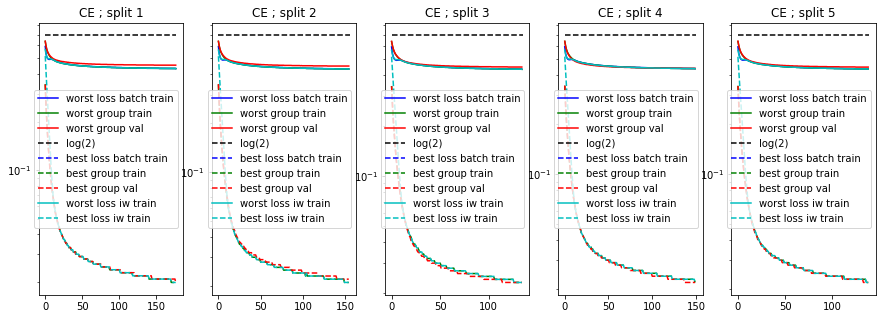

{'train': 152, 'val': 150}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho07_epsilon1e2 ### 0.01 0.7
{'train': 136, 'val': 146}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho07_epsilon1e2 ### 0.01 0.7
{'train': 133, 'val': 143}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho07_epsilon1e2 ### 0.01 0.7
{'train': 169, 'val': 178}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho07_epsilon1e2 ### 0.01 0.7
{'train': 177, 'val': 177}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho07_epsilon1e2 ### 0.01 0.7


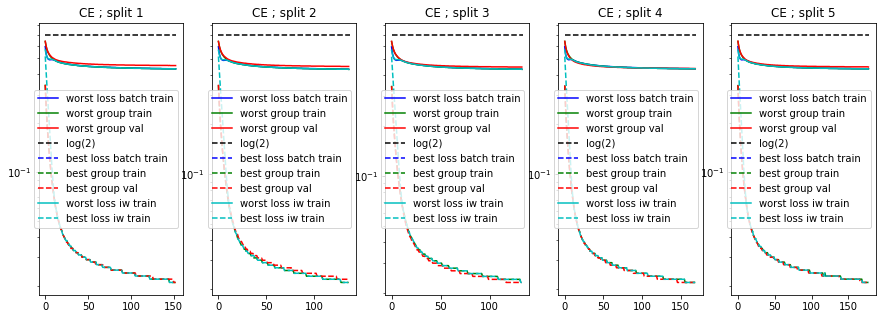

{'train': 150, 'val': 148}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho075_epsilon1e3 ### 0.001 0.75
{'train': 153, 'val': 156}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho075_epsilon1e3 ### 0.001 0.75
{'train': 129, 'val': 134}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho075_epsilon1e3 ### 0.001 0.75
{'train': 142, 'val': 149}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho075_epsilon1e3 ### 0.001 0.75
{'train': 149, 'val': 147}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho075_epsilon1e3 ### 0.001 0.75


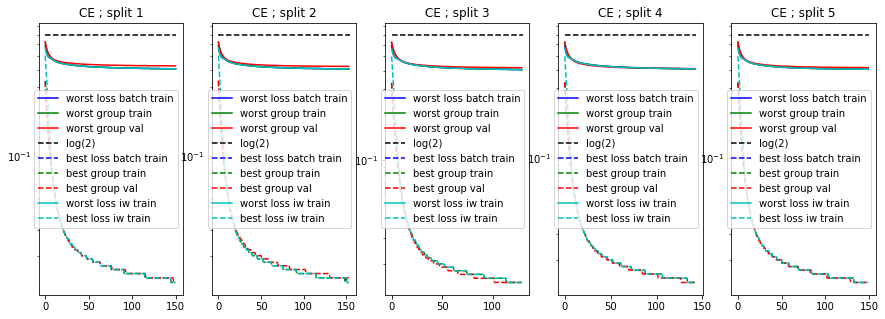

{'train': 150, 'val': 155}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho075_epsilon1e2 ### 0.01 0.75
{'train': 134, 'val': 136}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho075_epsilon1e2 ### 0.01 0.75
{'train': 129, 'val': 134}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho075_epsilon1e2 ### 0.01 0.75
{'train': 142, 'val': 149}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho075_epsilon1e2 ### 0.01 0.75
{'train': 148, 'val': 145}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho075_epsilon1e2 ### 0.01 0.75


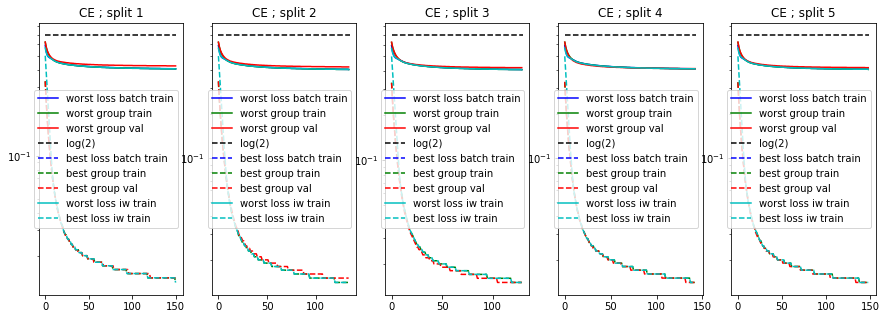

{'train': 146, 'val': 146}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho08_epsilon1e3 ### 0.001 0.8
{'train': 131, 'val': 125}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho08_epsilon1e3 ### 0.001 0.8
{'train': 141, 'val': 153}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho08_epsilon1e3 ### 0.001 0.8
{'train': 134, 'val': 135}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho08_epsilon1e3 ### 0.001 0.8
{'train': 126, 'val': 122}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho08_epsilon1e3 ### 0.001 0.8


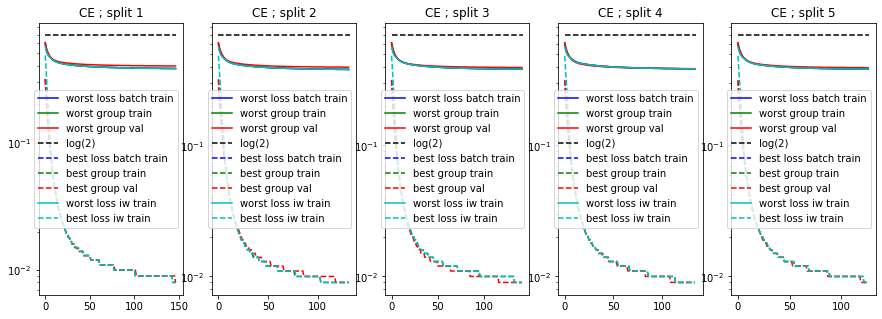

{'train': 129, 'val': 131}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho08_epsilon1e2 ### 0.01 0.8
{'train': 131, 'val': 124}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho08_epsilon1e2 ### 0.01 0.8
{'train': 141, 'val': 152}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho08_epsilon1e2 ### 0.01 0.8
{'train': 134, 'val': 134}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho08_epsilon1e2 ### 0.01 0.8
{'train': 126, 'val': 122}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho08_epsilon1e2 ### 0.01 0.8


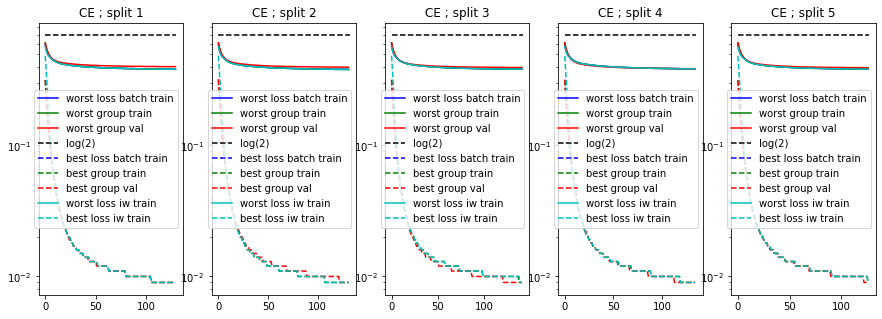

{'train': 135, 'val': 139}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho085_epsilon1e3 ### 0.001 0.85
{'train': 140, 'val': 151}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho085_epsilon1e3 ### 0.001 0.85
{'train': 128, 'val': 132}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho085_epsilon1e3 ### 0.001 0.85
{'train': 120, 'val': 135}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho085_epsilon1e3 ### 0.001 0.85
{'train': 131, 'val': 136}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho085_epsilon1e3 ### 0.001 0.85


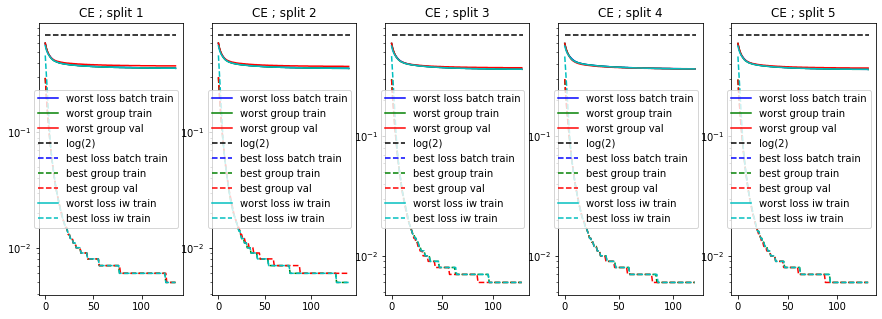

{'train': 135, 'val': 139}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho085_epsilon1e2 ### 0.01 0.85
{'train': 140, 'val': 156}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho085_epsilon1e2 ### 0.01 0.85
{'train': 128, 'val': 132}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho085_epsilon1e2 ### 0.01 0.85
{'train': 120, 'val': 135}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho085_epsilon1e2 ### 0.01 0.85
{'train': 131, 'val': 135}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho085_epsilon1e2 ### 0.01 0.85


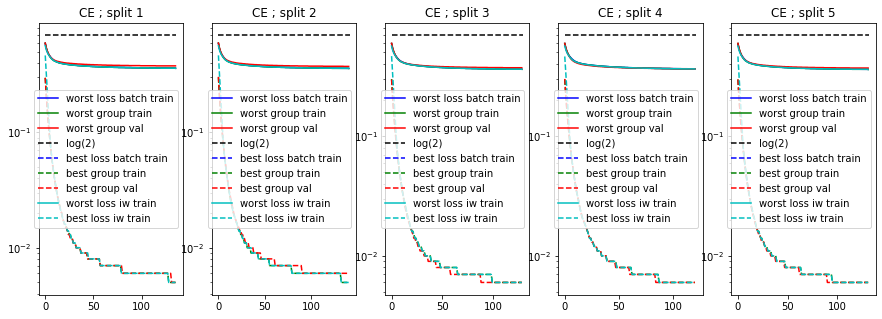

{'train': 130, 'val': 127}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho09_epsilon1e3 ### 0.001 0.9
{'train': 117, 'val': 127}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho09_epsilon1e3 ### 0.001 0.9
{'train': 140, 'val': 154}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho09_epsilon1e3 ### 0.001 0.9
{'train': 127, 'val': 119}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho09_epsilon1e3 ### 0.001 0.9
{'train': 126, 'val': 136}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho09_epsilon1e3 ### 0.001 0.9


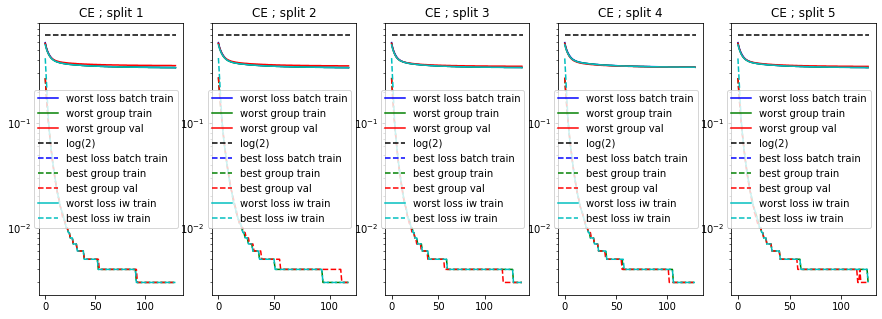

{'train': 130, 'val': 127}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho09_epsilon1e2 ### 0.01 0.9
{'train': 117, 'val': 127}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho09_epsilon1e2 ### 0.01 0.9
{'train': 140, 'val': 154}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho09_epsilon1e2 ### 0.01 0.9
{'train': 127, 'val': 119}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho09_epsilon1e2 ### 0.01 0.9
{'train': 128, 'val': 136}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho09_epsilon1e2 ### 0.01 0.9


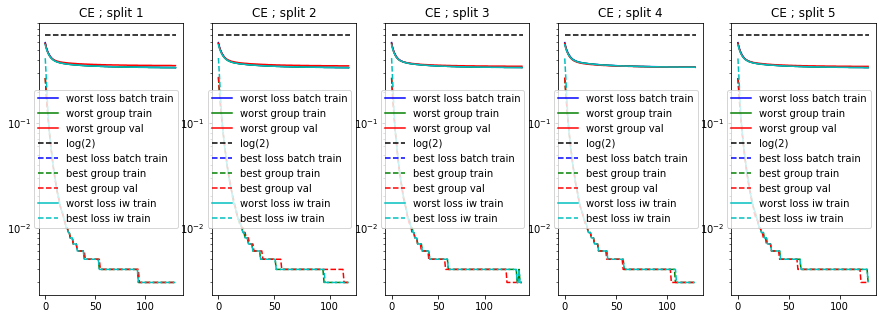

{'train': 121, 'val': 129}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho1_epsilon1e3 ### 0.001 1.0
{'train': 121, 'val': 129}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho1_epsilon1e3 ### 0.001 1.0
{'train': 121, 'val': 129}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho1_epsilon1e3 ### 0.001 1.0
{'train': 121, 'val': 129}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho1_epsilon1e3 ### 0.001 1.0
{'train': 121, 'val': 129}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho1_epsilon1e3 ### 0.001 1.0


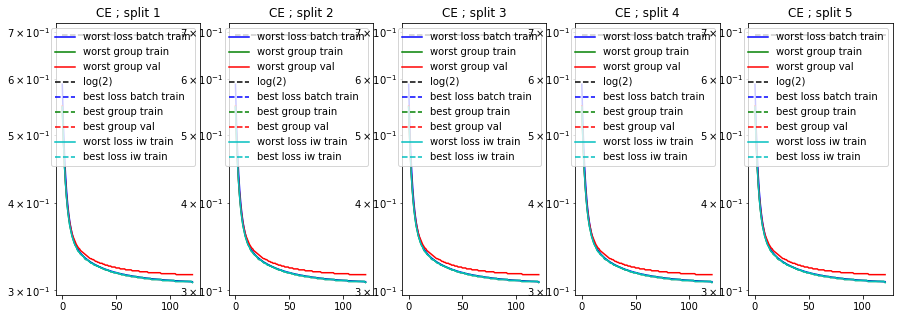

{'train': 112, 'val': 106}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split1rho1_epsilon1e2 ### 0.01 1.0
{'train': 117, 'val': 111}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split2rho1_epsilon1e2 ### 0.01 1.0
{'train': 116, 'val': 108}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split3rho1_epsilon1e2 ### 0.01 1.0
{'train': 121, 'val': 125}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split4rho1_epsilon1e2 ### 0.01 1.0
{'train': 121, 'val': 129}
 ###  BPF_512_adam1e5_wreg1e2_CE_seed42_split5rho1_epsilon1e2 ### 0.01 1.0


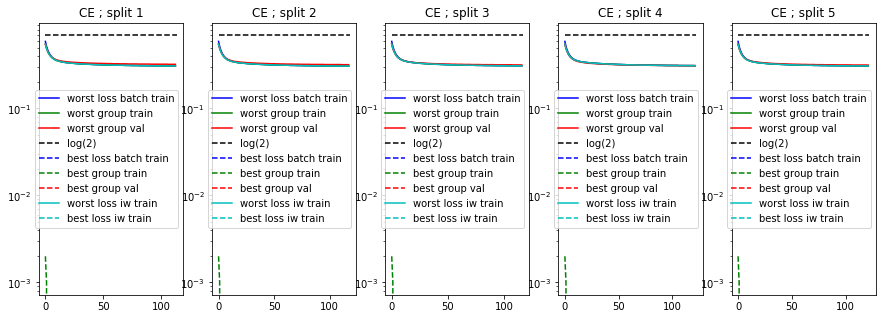

In [347]:
dataset = 'adult'
# dataset = 'lawschool'
# dataset = 'compas'
# dataset = 'synth1d2c'

basedir = '/data/natalia/models/'+dataset+'/BPF/' #folder with the models
model_name_prefix = 'BPF_512_adam1e5_wreg1e2_'
if 'synth' in dataset:
    model_name_prefix = 'DRO_512_adam1e4_'
    
seed = 42
loss = 'CE'

epsilon_list = ['1e3','1e2']
rho_list = ['005','01','015','02','025','03','035','04','045',
            '05','055','06','065','07','075','08','085','09','1']
split_list = [1,2,3,4,5]
nofiles_list = []

pd_summary = None
for rho_str in rho_list:
    for epsilon_str in epsilon_list:
        plt.figure(figsize=(15,5))
        for split in split_list:
            model_name = model_name_prefix + loss + '_seed' + str(seed) + '_split' + \
                                     str(split) + 'rho' + rho_str + '_epsilon' + epsilon_str
            
            if os.path.exists(basedir+model_name+'/summary_performance.csv'):
                config = load_json(basedir+model_name+'/config.json')
                history = load_json(basedir+model_name+'/history.json')
                pd_summary_ix = pd.read_csv(basedir+model_name+'/summary_performance.csv')
                
                print(history['best_game'])
                if pd_summary is None:
                    pd_summary = pd_summary_ix.copy()
                else:
                    pd_summary = pd.concat([pd_summary,pd_summary_ix],axis = 0)

                print(' ### ',model_name, '###', config['epsilon'], config['rho'])

                plt.subplot(1,len(split_list),split)
                plt.title(loss + ' ; split ' + str(split))
                tag = 'train'
                plt.semilogy(history['loss_a1_mbatch_train'][0:history['best_game'][tag]+1],'b',label = 'worst loss batch train')
                plt.semilogy(history['loss_a1_train'][0:history['best_game'][tag]+1],'g',label = 'worst group train')
                plt.semilogy(history['loss_a1_val'][0:history['best_game'][tag]+1],'r',label = 'worst group val')

                plt.semilogy([0,history['best_game'][tag]+1],[np.log(2),np.log(2)],'k--',label = 'log(2)')

                plt.semilogy(history['loss_a0_mbatch_train'][0:history['best_game'][tag]+1],'b--',label = 'best loss batch train')
                plt.semilogy(history['loss_a0_train'][0:history['best_game'][tag]+1],'g--',label = 'best group train')
                plt.semilogy(history['loss_a0_val'][0:history['best_game'][tag]+1],'r--',label = 'best group val')

                plt.semilogy(history['loss_iw_a1_train'][0:history['best_game'][tag]+1],'c',label = 'worst loss iw train')
                plt.semilogy(history['loss_iw_a0_train'][0:history['best_game'][tag]+1],'c--',label = 'best loss iw train')

                plt.legend()
            else:
                nofiles_list.append(model_name)
        plt.show()
        
if len(nofiles_list)>0:
    print('### ')
    print('Not found files : !!!!!!! ')
    for file in nofiles_list:
        print(file)

In [348]:
nofiles_list

[]

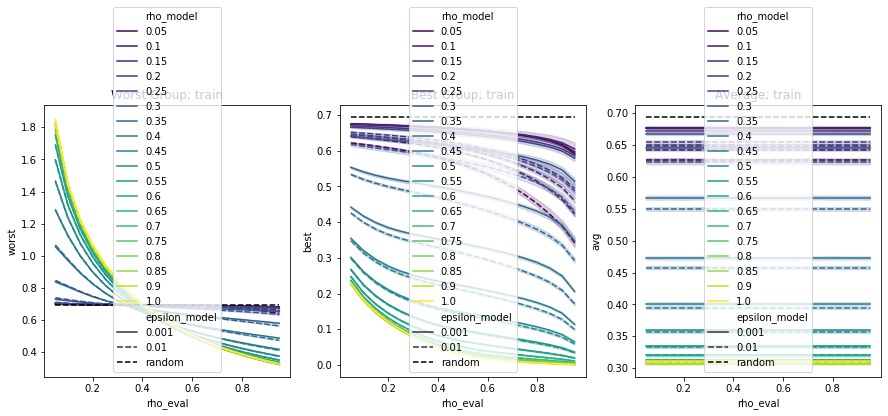

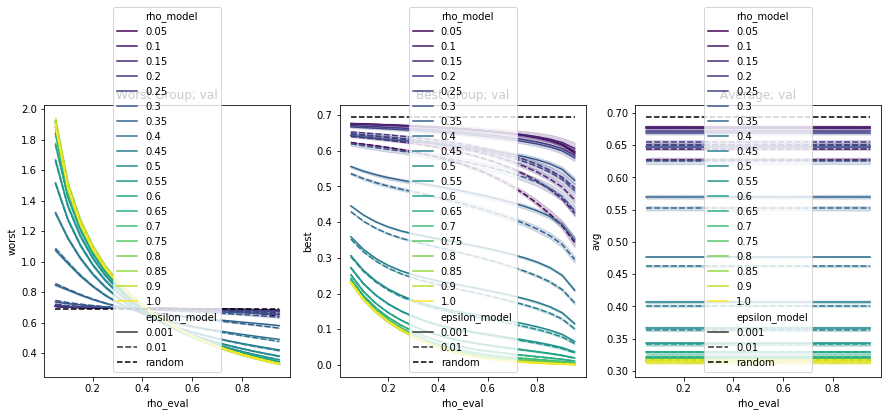

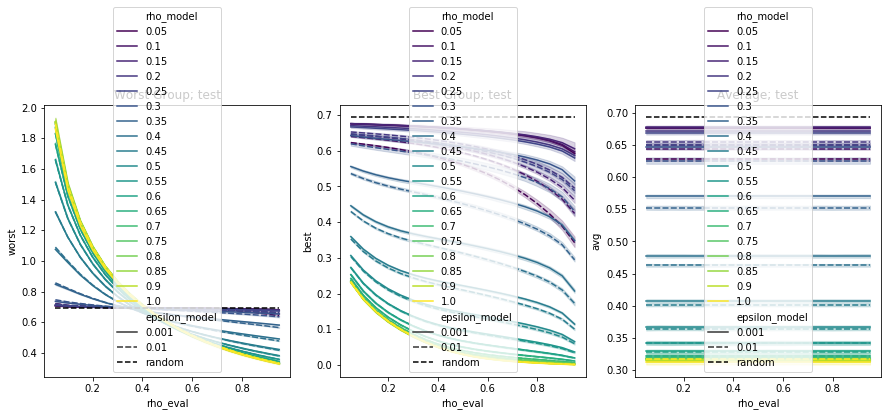

In [349]:
metric = 'ce'

from matplotlib import cm
cm_function = cm.bwr
cm_function = cm.viridis
param_tag = 'rho_model'

for dataset in ['train','val','test']:
    pd_aux = pd_summary.loc[(pd_summary.dataset == dataset) & (pd_summary.metric == metric)]
    
    if metric == 'softerr':
        value_random = 0.5
    else:
        value_random = np.log(2)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('Worst Group; '+dataset)
    import seaborn as sns
    sns.lineplot(data=pd_aux,x='rho_eval',y='worst',
                 hue ='rho_model',palette=cm_function,legend='full',style ='epsilon_model')
        
    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.title('Best Group; '+dataset)
    sns.lineplot(data=pd_aux,x='rho_eval',y='best',
                 hue ='rho_model',palette=cm_function,legend='full',style ='epsilon_model')

    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.title('Average; '+dataset)
    sns.lineplot(data=pd_aux,x='rho_eval',y='avg',
                 hue ='rho_model',palette=cm_function,legend='full',style ='epsilon_model')

    plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
             [value_random,value_random],'k--',label = 'random')
    plt.legend()
    plt.show()


 Epsilon (lower bound) :  0.001


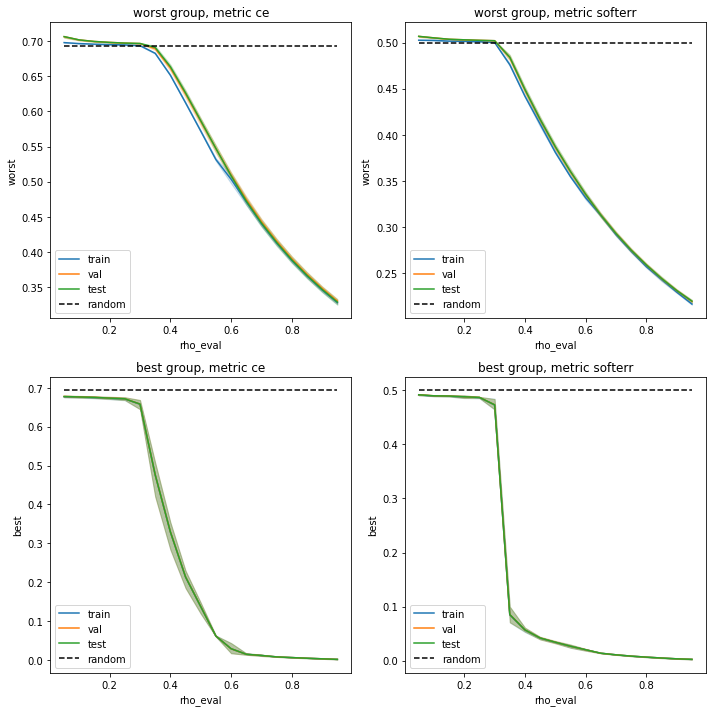



 --------------------------------------------------------  

 Epsilon (lower bound) :  0.01


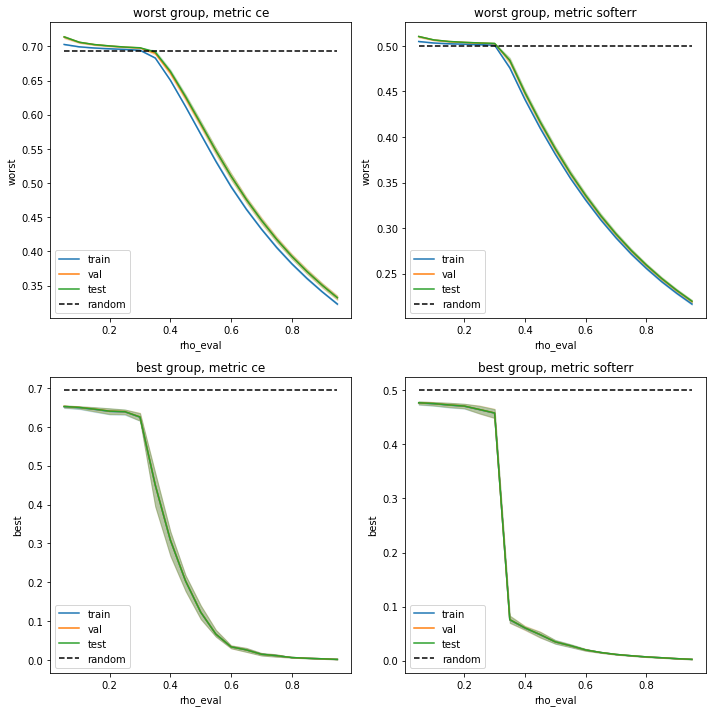



 --------------------------------------------------------  



In [350]:
from general.evaluation import get_best_model

for epsilon in pd_summary.epsilon_model.unique():
    print(' Epsilon (lower bound) : ', epsilon)
    pd_out = get_best_model(pd_summary.loc[pd_summary.epsilon_model == epsilon],
                            model_tag='rho_model', dataset_choice=['val'], precision=3)
    
    plt.figure(figsize=(10,10))
    ix = 1
    for group in ['worst','best']:

        for metric in ['ce','softerr']:

            if (metric == 'softerr'):
                value_random = 0.5
            else:
                value_random = np.log(2)

            plt.subplot(2,2,ix)
            ix += 1

            pd_aux = pd_out.loc[(pd_out.metric == metric)]
            plt.title(group + ' group, metric '+metric)
            sns.lineplot(data = pd_aux, x = 'rho_eval',y=group,hue='dataset')
            plt.plot([pd_aux.rho_eval.min(),pd_aux.rho_eval.max()],
                     [value_random,value_random],'k--',label = 'random')
            plt.legend()
    #         plt.yscale('log')
    plt.tight_layout()
    plt.show()
    print()
    print()
    print(' --------------------------------------------------------  ')
    print()